<h1 align="center">Variables Aleatorias y sus Momentos Centrales.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

Una <a href="https://es.wikipedia.org/wiki/Variable_aleatoria" target="_blank">variables aleatorias</a> corresponde con una variable asociada a un experimento aleatorio.  Estas variables tienen asociada una cierta distribución estadística y se pueden describir en términos de sus <a href="https://en.wikipedia.org/wiki/Central_moment" target="_blank">momentos centrales</a>.  En este Jupyter Notebook se explorarán las variables aleatorias y sus momentos centrales.

## 1. Cargar librerias

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

<h2>2. Ejemplo de variables</h2>
<h3>2.1. Variables determinísticas</h3>
Estas variables pueden ser predichas con precisión, es decir, siempre se puede conocer el valor correspondiente de la variable si se mantienen las condiciones del experimento.

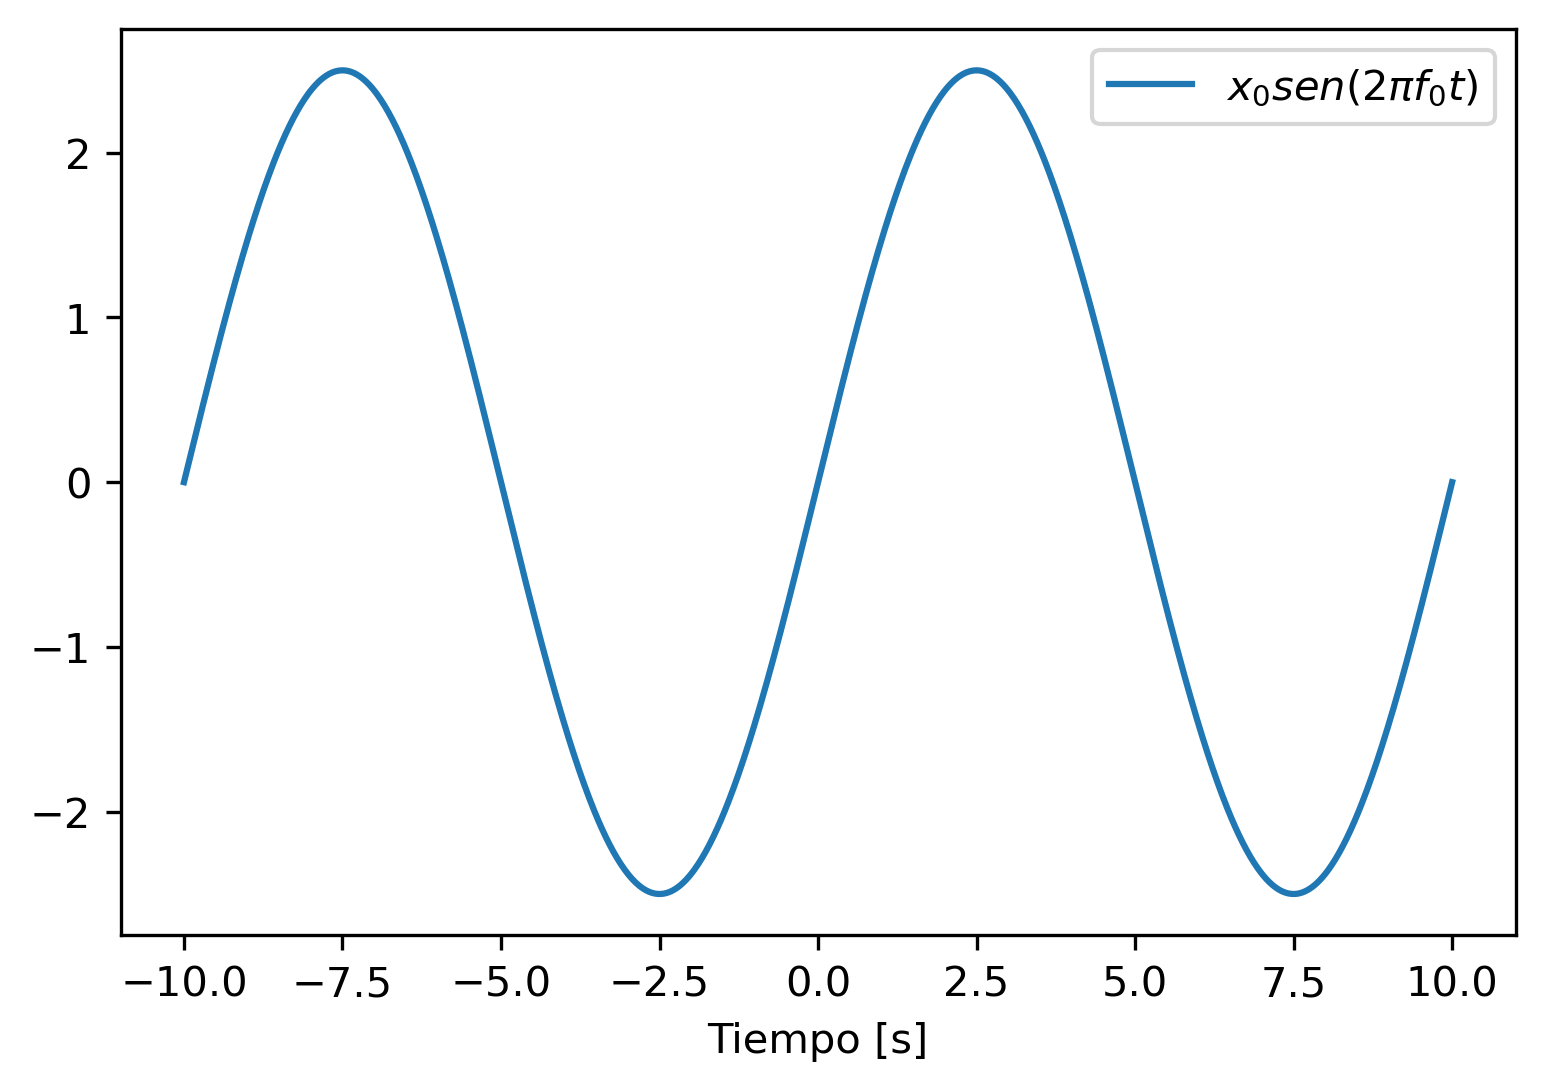

In [2]:
fo = 0.1 # [Hz]
t  = np.linspace(-1/fo, 1/fo, 1000) # [s]
x  = 2.5 * np.sin(2 * np.pi * fo * t)
dpi = 300
plt.figure(dpi=dpi)
plt.plot(t, x, label=r'$x_0 sen(2\pi f_0 t)$')
plt.legend()
_ = plt.xlabel('Tiempo [s]')

### 2.2. Distribución de Probabilidad, $F_X(x)$
Cada suceso definido sobre una cierta variable aleatoria $X$ tiene asociado una [distribución de probabilidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) $F_X(x)$.  En la práctica, al tener un número finito de datos, la distribución de probabilidad que se puede obtener a partir de los datos corresponde con la distribución de frecuencias, que corresponde al número de ocurrencias de un suceso en un cierto rango de la variable aleatoria.

## 2.3. Métodos para graficar $X$ y $F_X(x)$

In [3]:
def plotX(X, dpi=dpi):
    N = len(X)
    mu = np.mean(X)
    sigma = np.std(X)
    plt.figure(dpi=dpi)
    plt.plot(X, 'ob', alpha=0.3)
    plt.xlabel('Experimento')
    plt.hlines(mu, 0, N, color='r', lw=2, label=r'$\mu$')
    plt.hlines(mu+sigma, 0, N, color='r', linestyles=':', label=r'$\mu\pm\sigma$')
    plt.hlines(mu-sigma, 0, N, color='r', linestyles=':')
    plt.legend()
    _ =plt.ylabel('Variable aleatoria, X')

In [4]:
def plotXF(X, F, dpi=dpi, bar_width=0.2):
    N = len(X)
    mu = np.mean(X)
    sigma = np.std(X)
    plt.figure(dpi=dpi)
    plt.bar(x, F, color='k', 
                width=bar_width,
                alpha=0.5, 
                label=r'Distribución de probabilidad, $F(x;n,p)$')
    plt.plot(X, 1.1*max(F)*np.ones(size), 
                'ob', ms=8, alpha=0.05, 
                label='Variable aleatoria, X')
    plt.axis([min(x), max(x), 0, 1.8*max(F)])
    xticks, texts = plt.xticks()
    plt.xlabel('x')
    plt.vlines(mu, 0, N, color='r', lw=2, label=r'$\mu$')
    plt.vlines(mu+sigma, 0, N, color='r', linestyles=':', label=r'$\mu\pm\sigma$')
    plt.vlines(mu-sigma, 0, N, color='r', linestyles=':')
    plt.legend()
    _ = plt.legend(loc=9)

### 2.3. Variable Aleatoria Binomial
$$F_X(x;p, n) = F(x;p, n) = P[X=x] = \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x}$$

### 2.3.1. Métodos

In [5]:
def X_binomial(n, p, size=100):
    if n != int(n):
        print('\nError! n must be an integer.')
        return np.array([])
    if np.abs(p) > 1:
        print("Error! p doesn't satisfy |p| ≤ 0.")
        return err
    return np.random.binomial(int(n), p, size=size)

In [6]:
def dist_binomial(x, n, p):
    fact = np.math.factorial
    comb = 1
    if type(x) == type(np.array([])) or type(x) == type([]):
        fact_ = lambda y: fact(n)/(fact(y)*fact(n-y))
        comb = np.array([fact_(yk) for yk in x])
    else:
        comb = fact(n) / (fact(x)*fact(n-x))
    return comb * np.power(p, x) * np.power(1-p, n-x) 

### 2.3.2. Figuras

In [7]:
n = 40; p = 0.5; size = 1000
x = 1 + np.arange(n)
F = dist_binomial(x, n, p)
X = X_binomial(n, p, size=size)

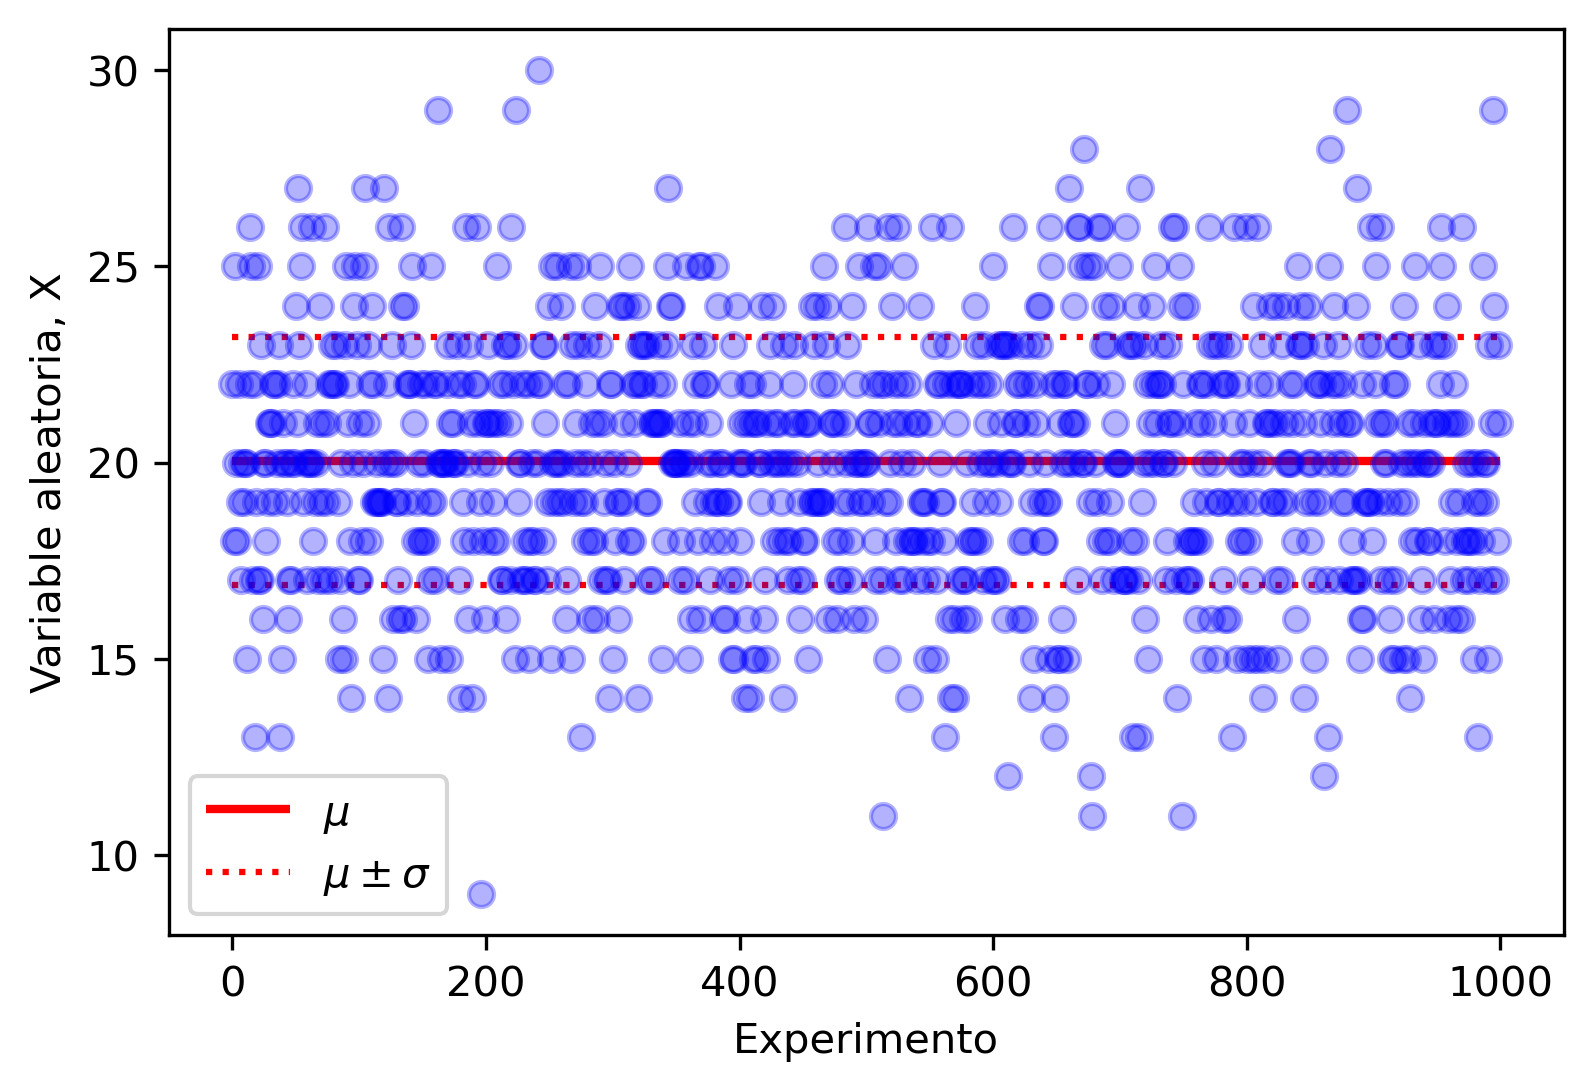

In [8]:
plotX(X, dpi=dpi)

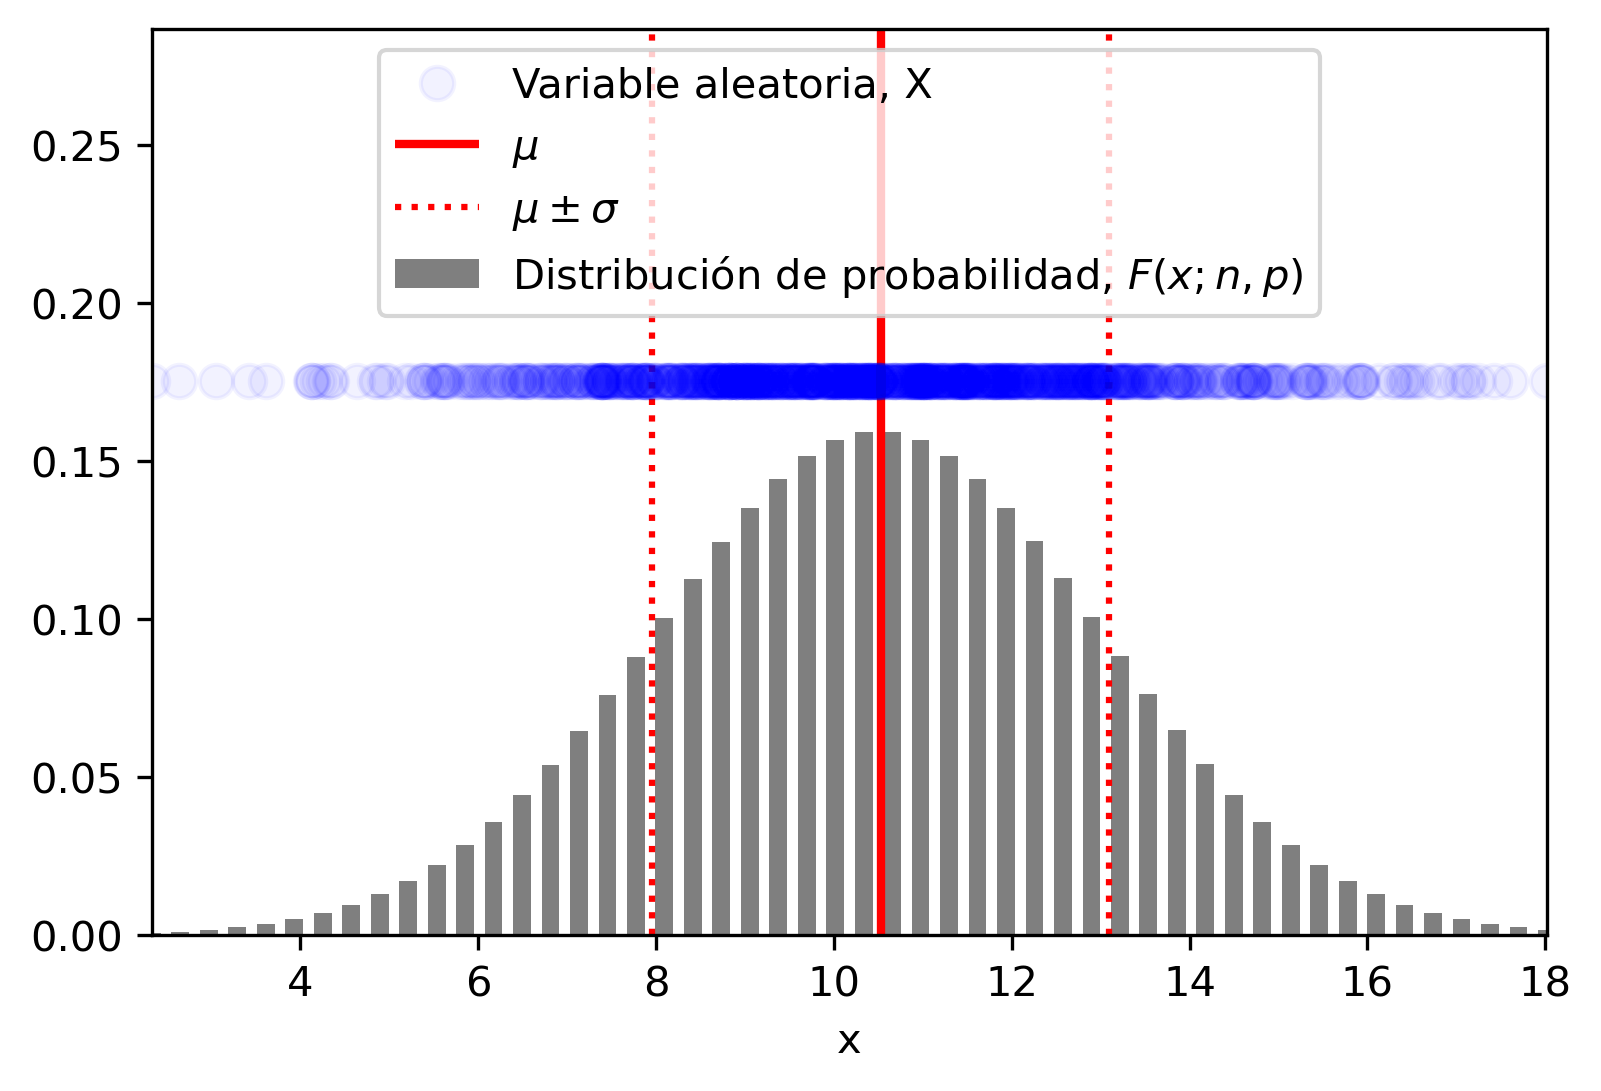

In [15]:
plotXF(X, F, dpi=dpi, bar_width=0.2)

### 2.4. Variable Aleatoria Normal
$$F_X(x;\mu, \sigma) = F(x;\mu, \sigma) = P[X=x] = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

### 2.4.1. Métodos

In [10]:
def X_normal(mu, sigma, size=100):
    if sigma < 0:
        print('Error! Sigma must be positive.')
        return np.array([])
    return np.random.normal(loc=mu, scale=sigma, size=size)

In [11]:
def dist_normal(x, mu, sigma):
    norm = 1/np.sqrt(2*np.pi*sigma**2)
    return norm*np.exp(-(x-mu)**2 / (2*sigma**2))

### 2.4.2. Figuras

In [12]:
mu = 10.5; sigma = 2.5; size = 1000
X = X_normal(mu, sigma, size=size)
x = np.linspace(min(X), max(X), 50)
F = dist_normal(x, mu, sigma)

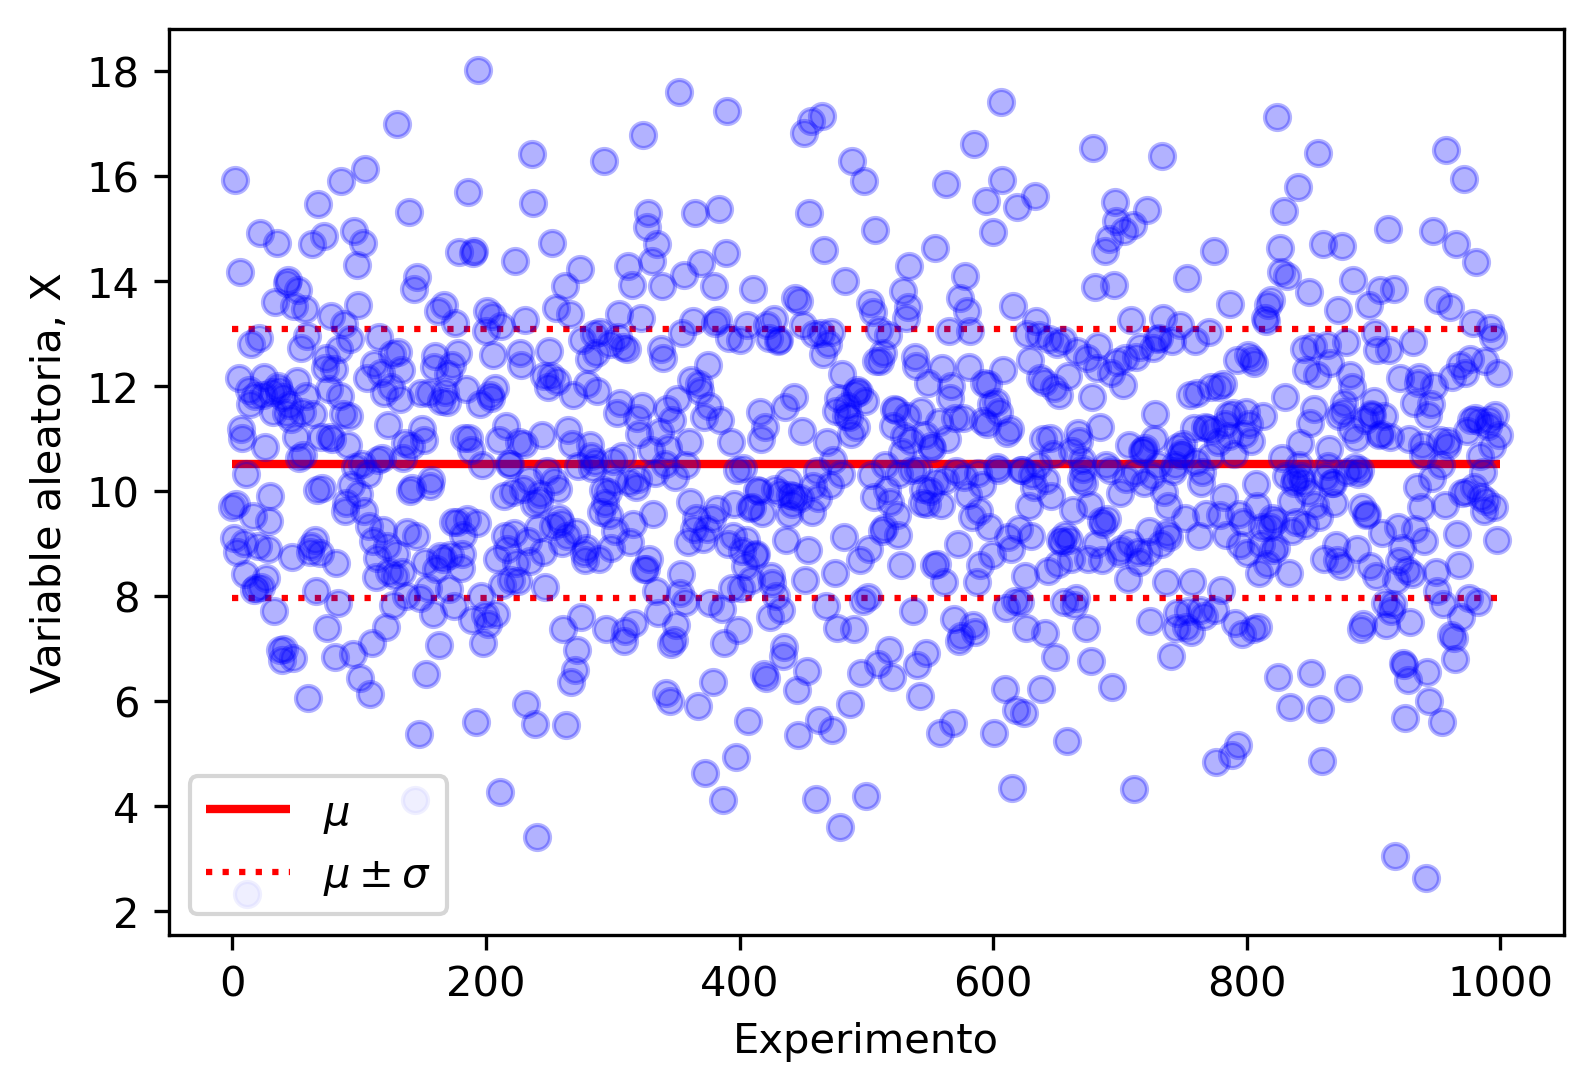

In [13]:
plotX(X)

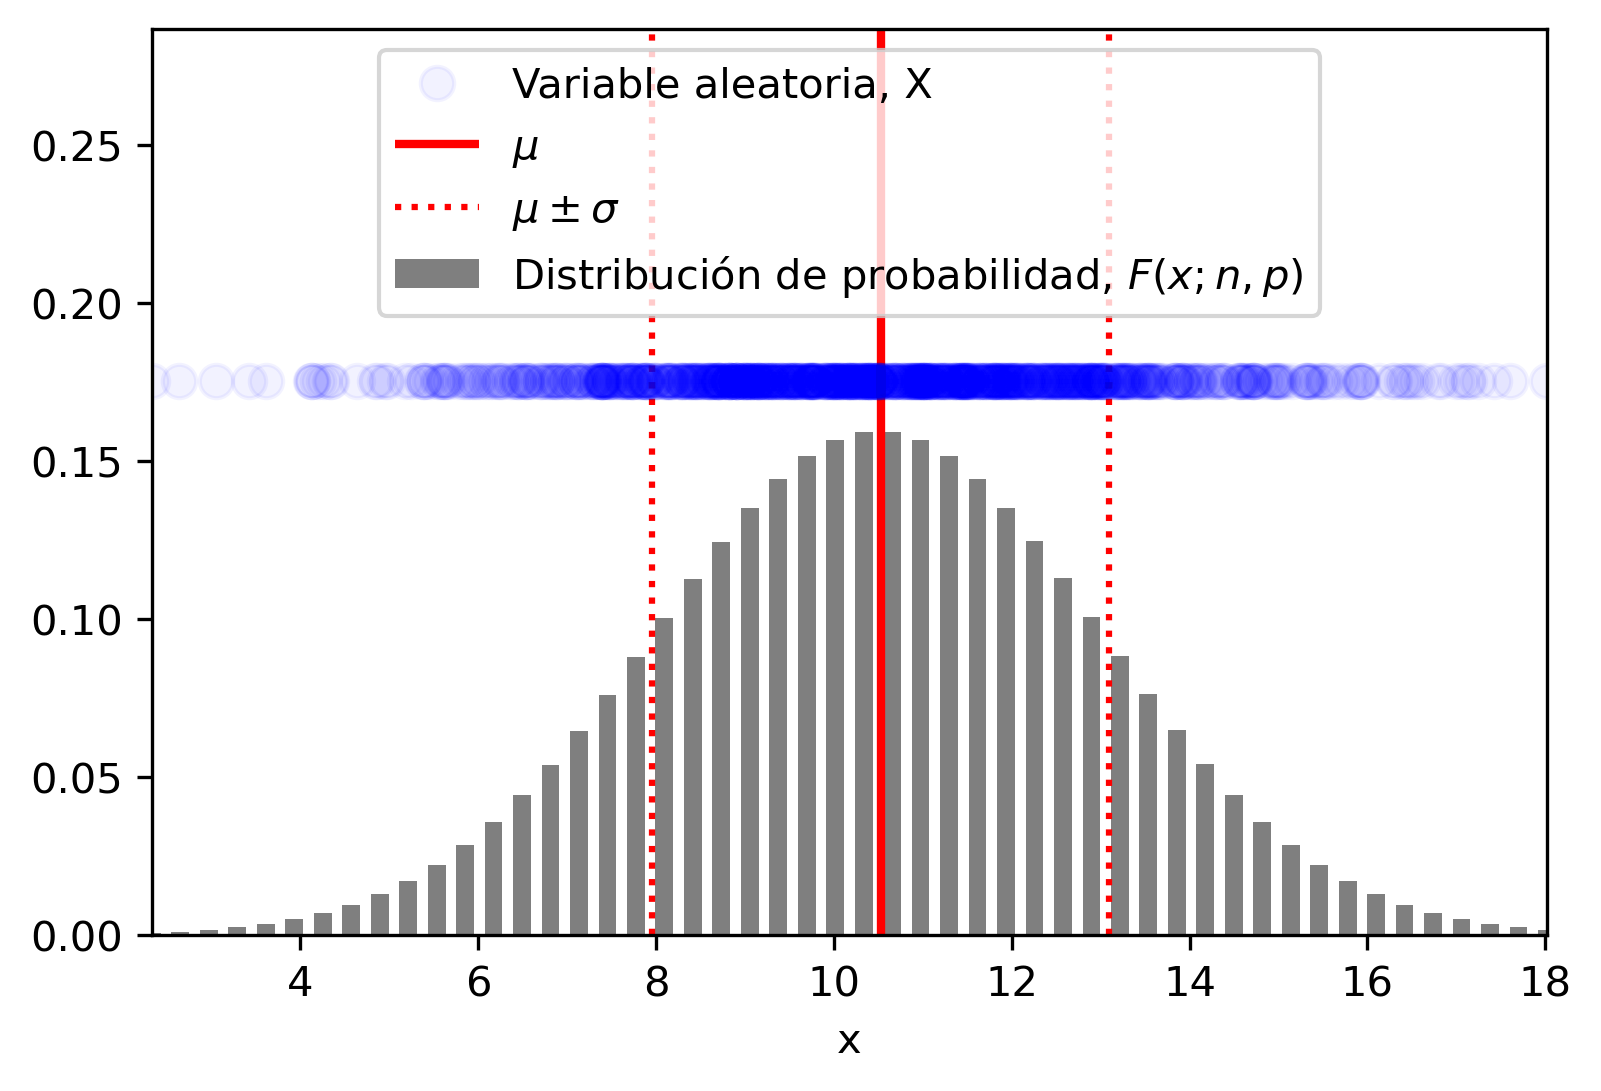

In [14]:
plotXF(X, F)

end!